In [1]:
import msgpack
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from PIL import Image
from io import BytesIO
from pathlib import Path

In [19]:
# try downloading shard0.msg and opening it: 


path = ".\\data\\" # put your path to the data

save_path = ".\\mp16\\"

for i,file in enumerate(os.listdir(path)):
    print(file)
    

shard_0.msg


In [20]:
shard1 = path + "shard_0.msg"
print(os.path.exists(shard1))

True


In [ ]:
images = []
with open(shard1,"rb") as infile:
    for i,record in enumerate(msgpack.Unpacker(infile,raw = False)):
        print(f'Image_id={record["id"]}, lat={record["latitude"]}, lon={record["longitude"]}')

        image = Image.open(BytesIO(record["image"]))
        images.append(image)

        # saving the images in their respective folders:
        name = record["id"]
        folders = record["id"].split("/")
        
        mkpath = "\\".join(folders[:-1])

        Path(save_path,mkpath).mkdir(parents=True,exist_ok=True)
        image.save(Path(save_path,name))

        if i==5:
            break

Image_id=ba/08/6468190417.jpg, lat=41.906, lon=12.455
Image_id=5a/c7/8582299397.jpg, lat=48.211072, lon=16.36736
Image_id=81/90/8694156503.jpg, lat=43.942876, lon=12.774091
Image_id=86/07/6337050880.jpg, lat=41.339055, lon=14.507789
Image_id=59/ed/4933214039.jpg, lat=-23.210269, lon=-44.693223
Image_id=4c/fa/263731207.jpg, lat=35.659384, lon=139.700673


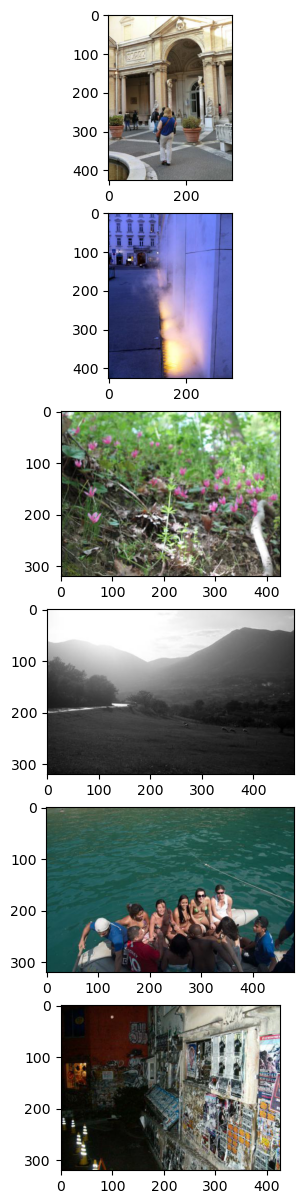

In [18]:
fig, ax  = plt.subplots(len(images),1,figsize = (15,15))
for i in range(len(images)):
    ax[i].imshow(images[i])